### PCA
#### iris 

In [2]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [10]:
iris=load_iris()

In [11]:
x=iris.data[:,[0,2]]
y=iris.target

In [12]:
print(x.shape,y.shape)

(150, 2) (150,)


In [14]:
feature_name=[iris.feature_names[0],iris.feature_names[2]]
x_data=pd.DataFrame(x,columns=feature_name)
x_data.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [15]:
y_data=pd.DataFrame(y,columns=['target'])
y_data.head()

,target
0,0
1,0
2,0
3,0
4,0


In [16]:
pca=PCA(n_components=2)
pca.fit(x_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.explained_variance_

array([3.66189877, 0.1400726 ])

In [19]:
pca.components_

array([[ 0.39360585,  0.9192793 ],
       [-0.9192793 ,  0.39360585]])

In [21]:
PCscore=pca.transform(x_data)
PCscore[0:5]

array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [22]:
x_data[0:5]

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [23]:
elgens_v=pca.components_.transpose()
print(elgens_v)

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


In [26]:
mX=np.matrix(x)
for i in range(x.shape[1]):
    mX[:,i]=mX[i,1]-np.mean(x[:,i])
mX_df=pd.DataFrame(mX)

In [28]:
(mX*elgens_v)[0:5]

matrix([[-3.91658259,  3.15654176],
        [-3.91658259,  3.15654176],
        [-3.91658259,  3.15654176],
        [-3.91658259,  3.15654176],
        [-3.91658259,  3.15654176]])

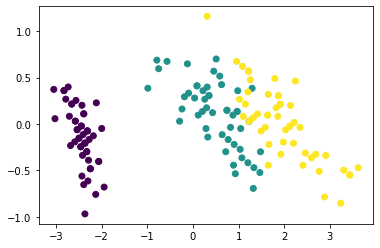

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(PCscore[:,0],PCscore[:,1],c=y)
plt.show()

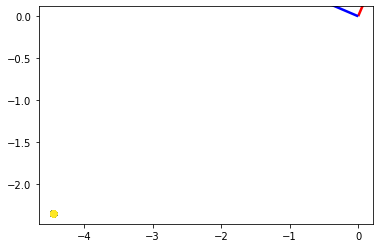

In [45]:
plt.scatter(mX_df[0],mX_df[1],c=y)
origin=[0],[0]
plt.quiver((0,0),(0,0),elgens_v[0,:],elgens_v[1,:],color=['r','b'],scale=3)
plt.show()

- #### 회귀분석

- from sklearn.linear_model import LogisticRegression
- from sklearn.metrics import confusion_matrix

In [46]:
x2=iris.data
pca2=PCA(n_components=4)
pca2.fit(x2)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
pca2.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [49]:
PC2score=pca2.transform(x2)[:,0:2]

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [58]:
cif=LogisticRegression(solver="sag",multi_class="multinomial",max_iter=10000).fit(x2,y)

In [59]:
cif2=LogisticRegression(solver="sag",multi_class="multinomial").fit(PC2score,y)

In [62]:
y_pred2=cif2.predict(PC2score)
y_pred=cif.predict(x2)

In [63]:
confusion_matrix(y,y_pred2)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

In [64]:
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]], dtype=int64)